# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained

## Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [1]:
#importing necessary libraries

import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score as sil 
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
airlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data') # open sheet with name 'data'
airlines.rename(columns={'ID#':'Id', 'Award?':'Award'}, inplace=True)
airlines.set_index('Id', inplace=True)

airlines.head() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airlines.shape

(3999, 11)

## Descriptive Statistics

In [4]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
airlines.isna().sum().sum()

0

No missing values 

In [7]:
airlines.duplicated().sum() 

1

In [8]:
airlines[airlines.duplicated()] 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
airlines=airlines.drop_duplicates() 

In [10]:
airlines.shape

(3998, 11)

In [11]:
airlines.duplicated().sum()  

0

One duplicate entry was present. We removed it 

## Data Visualisation

### Plotting histogram to see distribution & Plotting boxplot for Outlier Detection

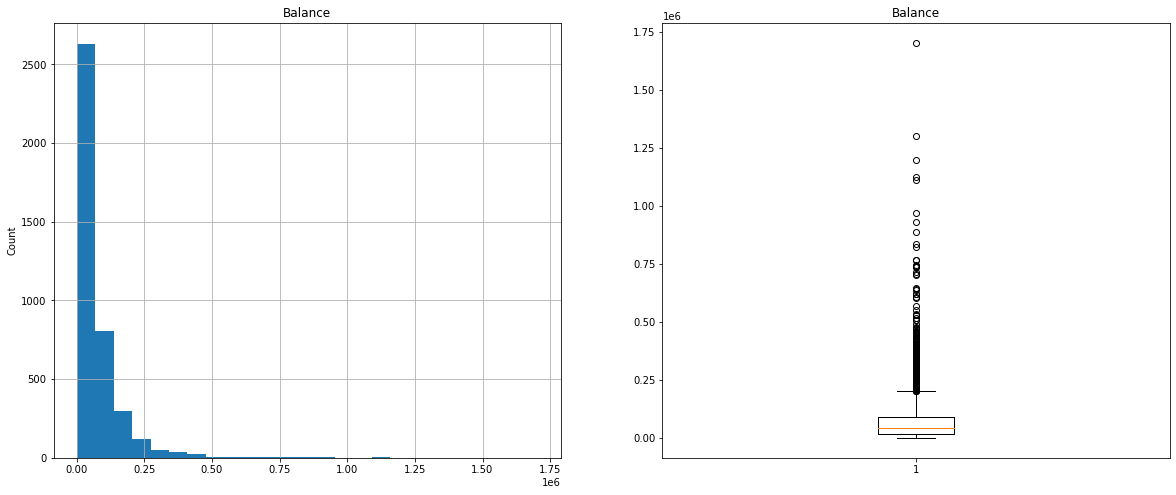

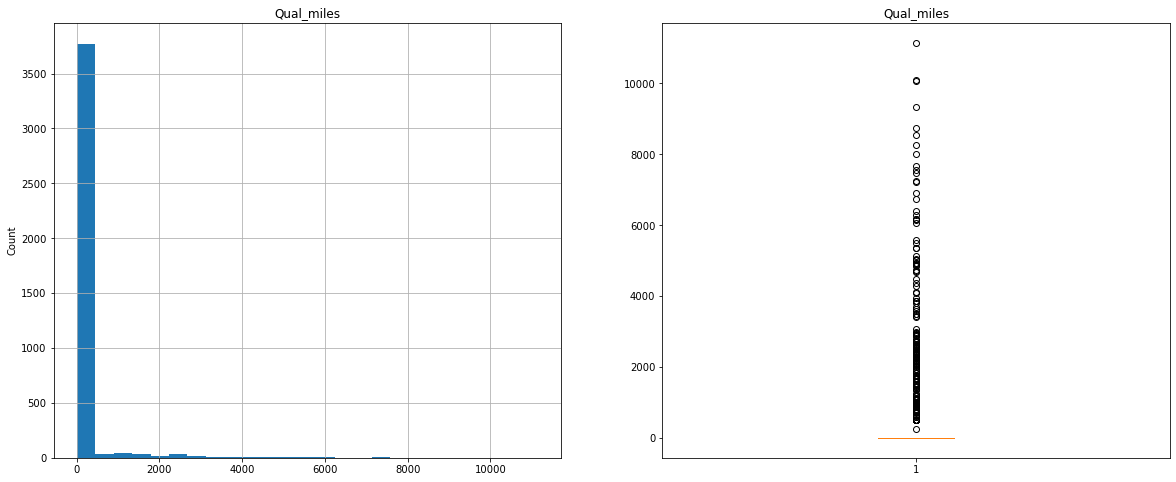

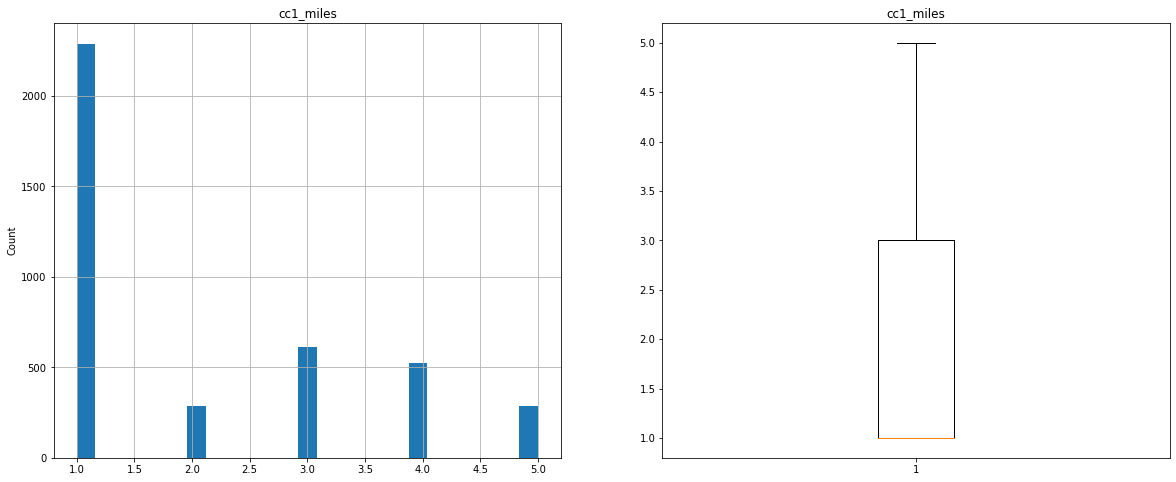

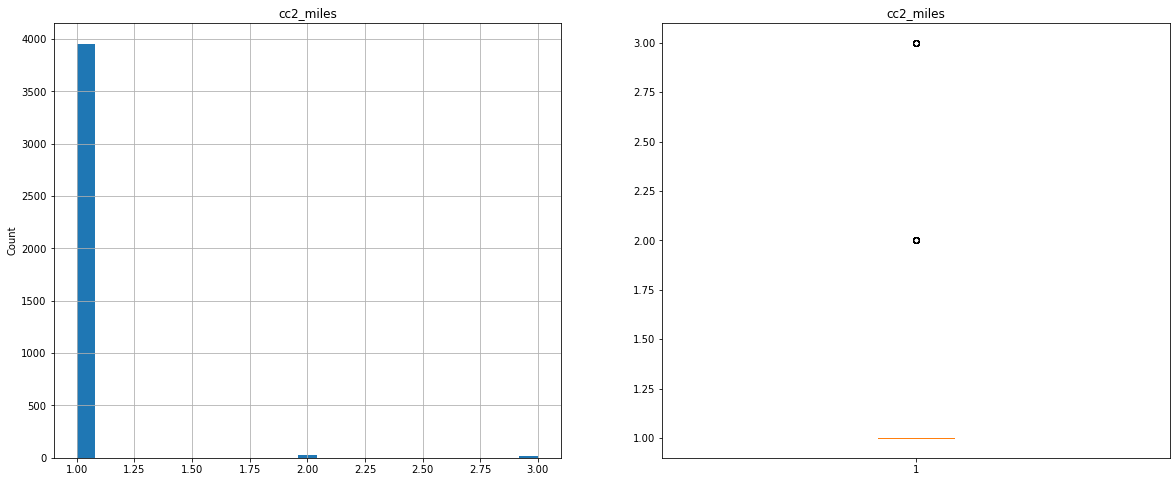

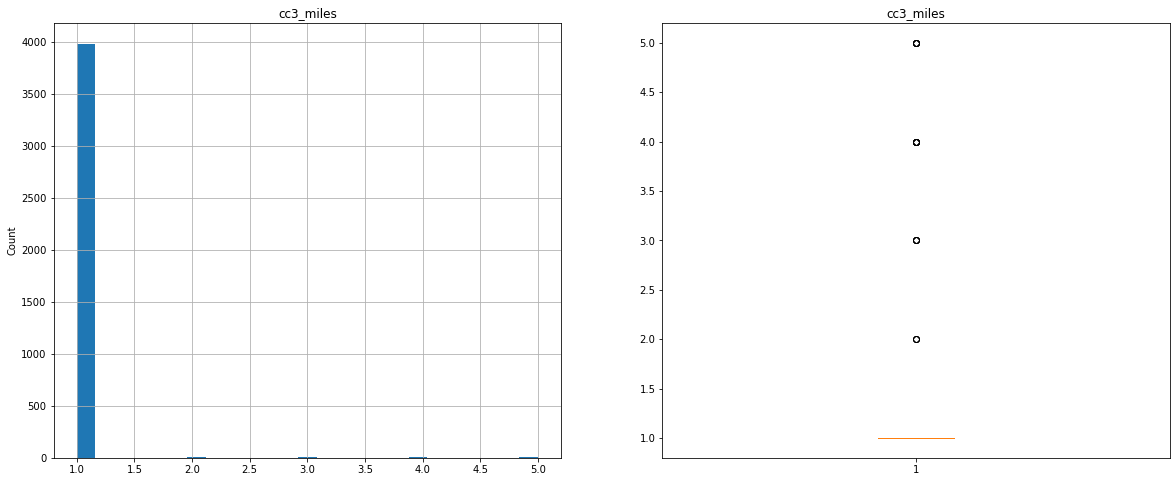

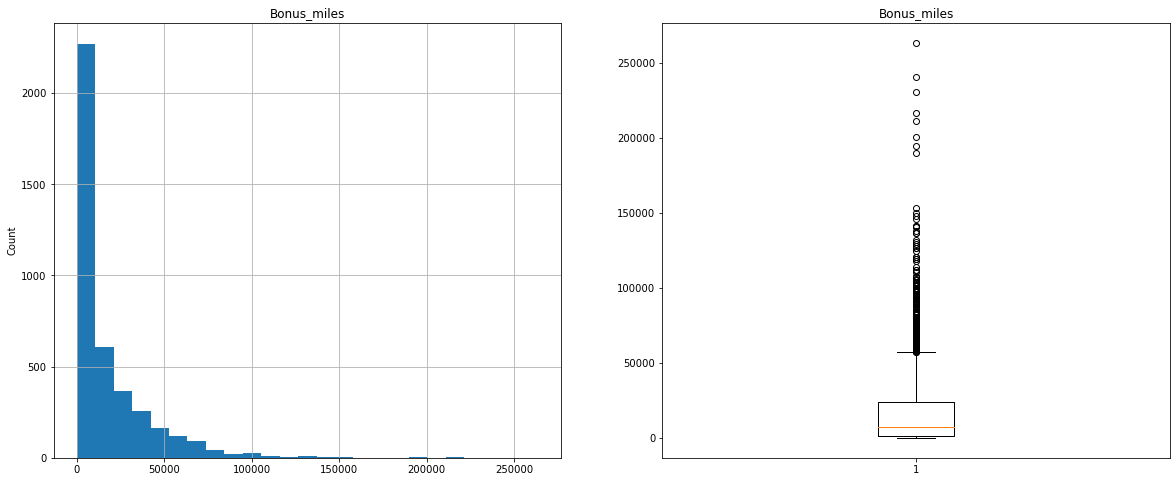

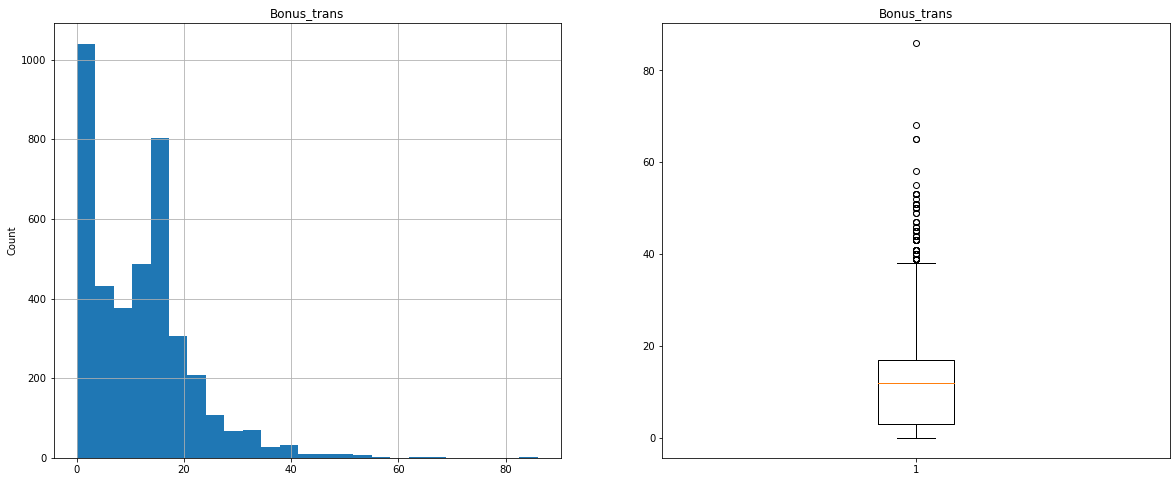

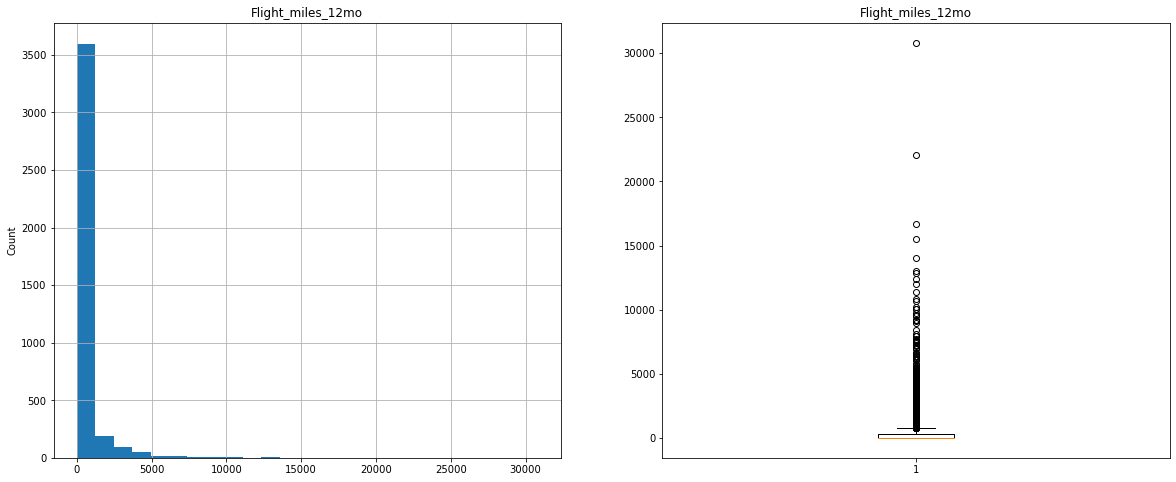

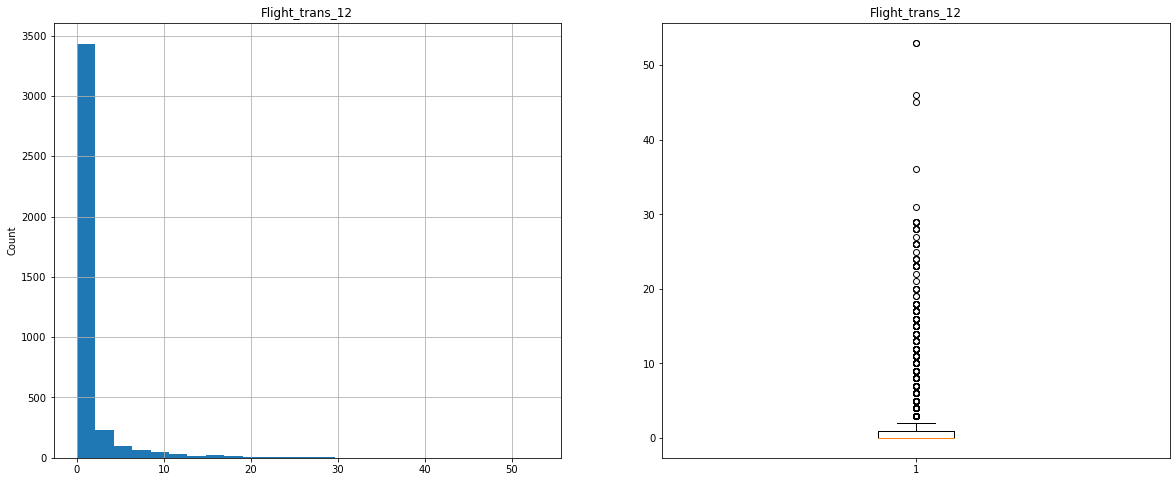

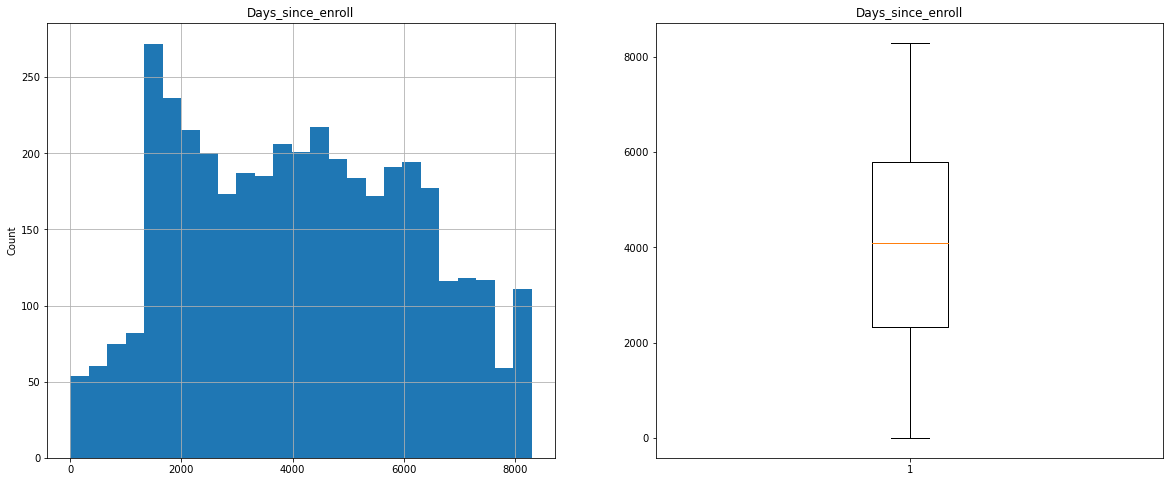

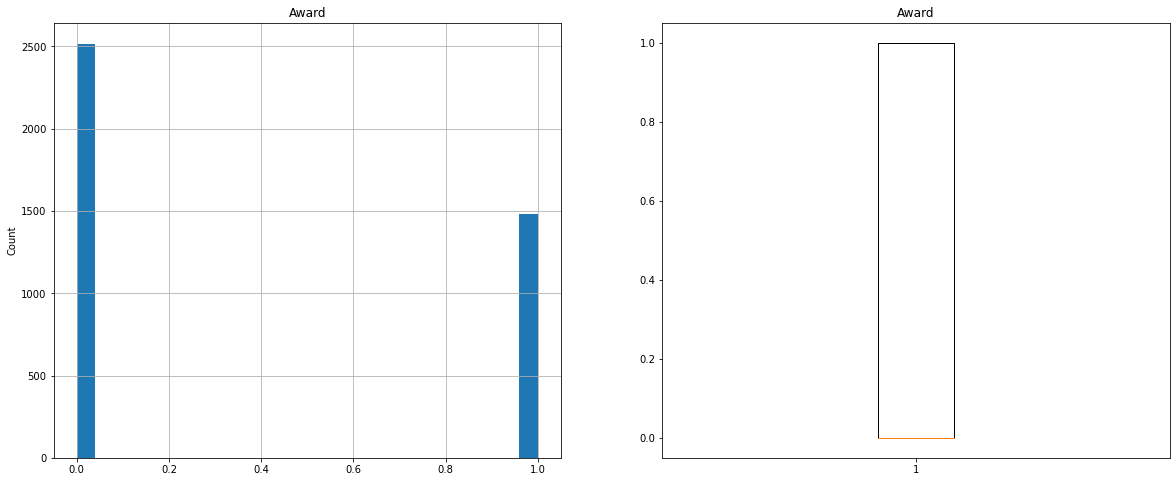

In [12]:
for feature in airlines.columns:
    
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    airlines[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    
    plt.subplot(1,2,2)
    plt.boxplot(airlines[feature])
    plt.title(feature)
    
    plt.show() 

### Correlations

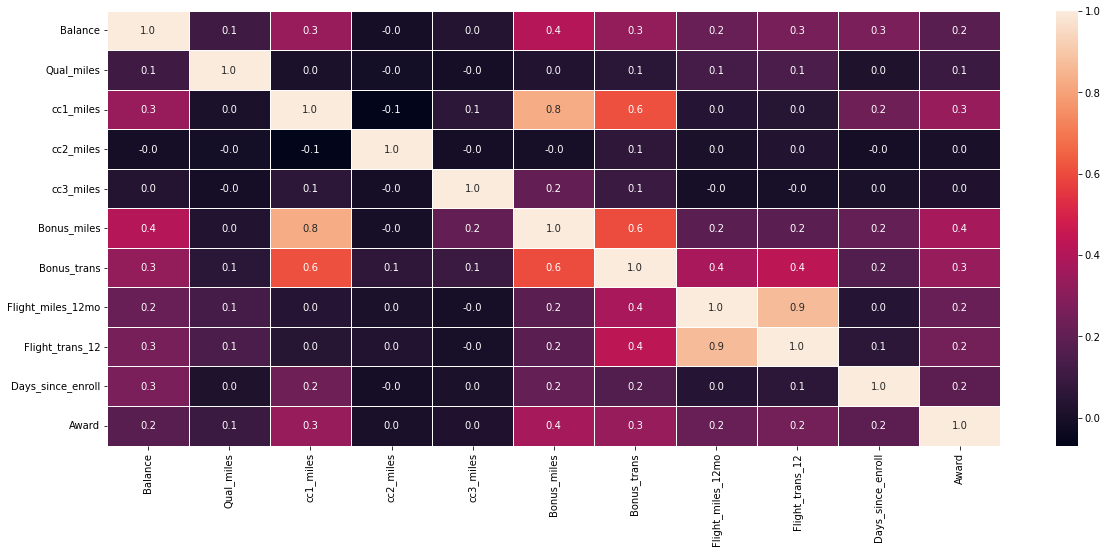

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(airlines.corr(), annot=True, fmt='0.1f', linewidths =.5) 
plt.show()

Positive correlation is found betweeen: 

a. Number of flight transactions in the past 12 months AND Number of flight miles in the past 12 months

b. -Miles earned from non-flight bonus transactions AND  Miles earned with freq. flyer credit card in the past 12 months

c. Non-flight bonus transactions AND  Miles earned with freq. flyer credit card

d. Non-flight bonus transactions AND Miles earned from non-flight bonus transactions

# Data Preprocessing

### Normalisation of data (use it for hierarchical clustering)

In [14]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [15]:
# Normalized data frame (considering the numerical part of data)
airlines_norm = norm_func(airlines)
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


### Standardisation of data (use it for K means and DBSCAN)

In [16]:
scaler = StandardScaler()
airlines_std = scaler.fit_transform(airlines) 
airlines_std

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# Clustering: 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

# 1) Hierarchical Clustering 

Hierarchy of clusters is in the form of a tree, and this tree-shaped structure is known as the dendrogram. There is no requirement to predetermine the number of clusters as in the K-Means algorithm.

Linkage methods are ways to calculate the distance between two clusters.

Single Linkage: It is the Shortest Distance between the closest points of the clusters

Complete Linkage: It is the farthest distance between the two points of two different clusters

Average Linkage: It is the linkage method in which the distance between each pair of datasets is added up and then divided by the total number of datasets to calculate the average distance between two clusters.

Centroid Linkage: It is the linkage method in which the distance between the centroid of the clusters is calculated. 

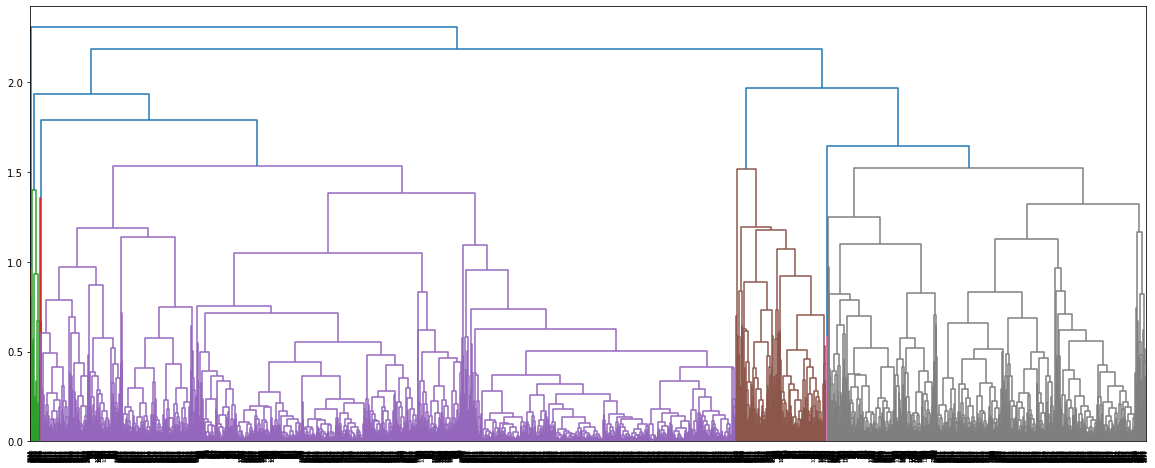

In [17]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'complete'))

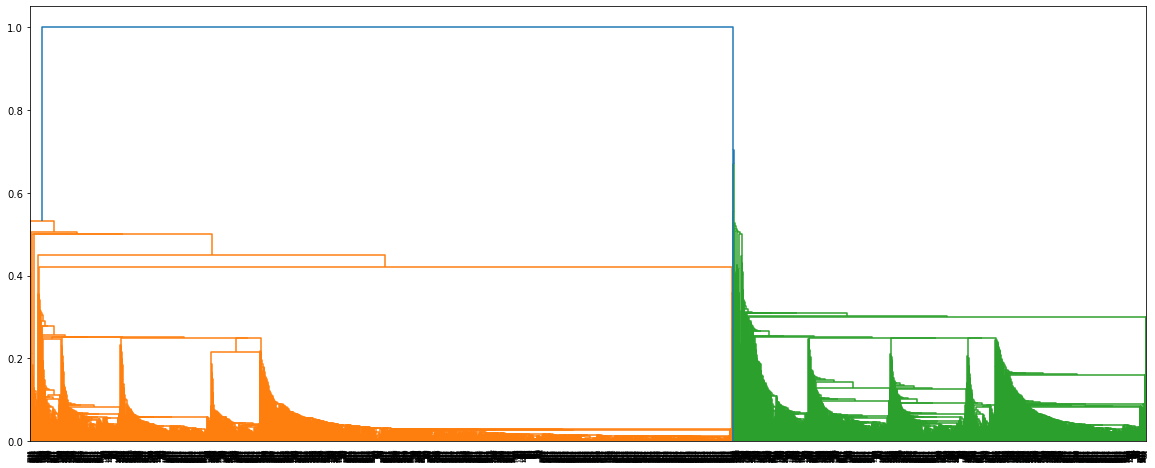

In [18]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'single'))

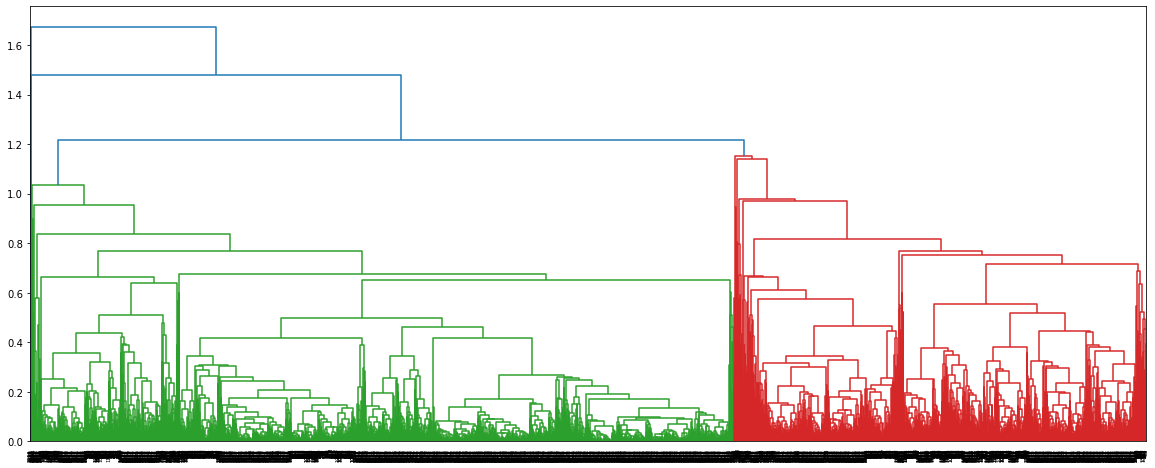

In [19]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'average'))

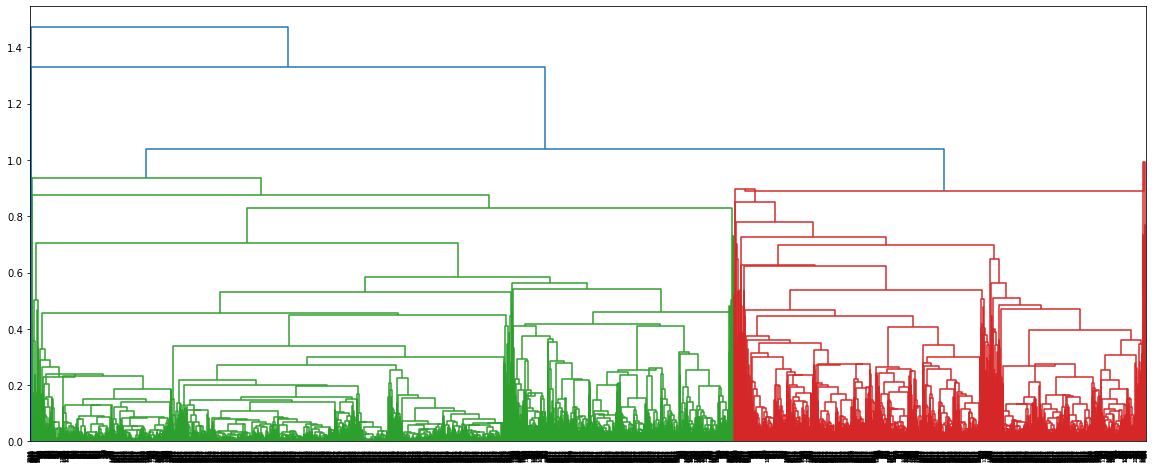

In [20]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method= 'centroid'))

### Silhouette Score 

In [21]:

linkages = ['complete' , 'single' , 'ward' , 'average']

for i in range (2,16):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(airlines_norm)
        sil_score = sil(airlines_norm, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))
 

For n= 2 and linkage = complete Silhouette score is 0.4704
For n= 2 and linkage = single Silhouette score is 0.5359
For n= 2 and linkage = ward Silhouette score is 0.5359
For n= 2 and linkage = average Silhouette score is 0.4704
For n= 3 and linkage = complete Silhouette score is 0.5318
For n= 3 and linkage = single Silhouette score is 0.5351
For n= 3 and linkage = ward Silhouette score is 0.4355
For n= 3 and linkage = average Silhouette score is 0.3961
For n= 4 and linkage = complete Silhouette score is 0.4645
For n= 4 and linkage = single Silhouette score is 0.4812
For n= 4 and linkage = ward Silhouette score is 0.4249
For n= 4 and linkage = average Silhouette score is 0.5286
For n= 5 and linkage = complete Silhouette score is 0.4167
For n= 5 and linkage = single Silhouette score is 0.48
For n= 5 and linkage = ward Silhouette score is 0.394
For n= 5 and linkage = average Silhouette score is 0.5082
For n= 6 and linkage = complete Silhouette score is 0.4172
For n= 6 and linkage = singl

### Silhouette score is maximum for 

For n= 2 and linkage = single Silhouette score is 0.5359

For n= 2 and linkage = ward Silhouette score is 0.5359 

In [22]:
# create clusters with single linkage and n_clusters = 2
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'single')

In [23]:
y_hc = hc.fit_predict(airlines_norm)
y_hc 

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [24]:
airlines['ClusterId_hc'] = y_hc
airlines 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
Id,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [25]:
airlines['ClusterId_hc'].value_counts()

1    2517
0    1481
Name: ClusterId_hc, dtype: int64

In [26]:
airlines.groupby('ClusterId_hc').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_hc,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


In [27]:
airlines[airlines.ClusterId_hc==0].head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
Id,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,20856,0,1,1,1,5250,4,250,1,6938,1,0
9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
12,96522,0,5,1,1,61105,19,0,0,6924,1,0


In [28]:
airlines[airlines.ClusterId_hc==1].head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
Id,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1


Here, Clustering is very precisely done because mean(Award) of clusterid 0 is 1 

And mean(Award) of clusterid 1 is 0 

Optimum no. of clusters is 2 

Cluster0 indicates the group of fliers that earn the most out of the card and are frequent fliers

Cluster1 indicates the group of fliers that earn the least and are the least frequent fliers

# 2) KMeans Clustering 

K-means clustering is an unsupervised algorithm. In an unsupervised algorithm, we are not interested in making predictions (since we don’t have a target/output variable). The objective is to discover interesting patterns in the data, e.g., are there any subgroups or ‘clusters’ in dataset

K-means is a centroid-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

Centroids of newly formed clusters do not change

Points remain in the same cluster

Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve. 

How to find optimum number of cluster?

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [29]:
wcss = []

for i in range (1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airlines_std)
    wcss.append(kmeans.inertia_)
    
wcss 

[43978.00000000003,
 35402.34837621176,
 30893.11168165174,
 27148.665385482644,
 23696.281421752734,
 21086.32585789828,
 19877.921691970343,
 17315.915710341415,
 15961.460885732235,
 14725.18561100447,
 13704.877019618045,
 12945.293037319609,
 12426.457990719557,
 11974.043140119276,
 11562.614067481605]

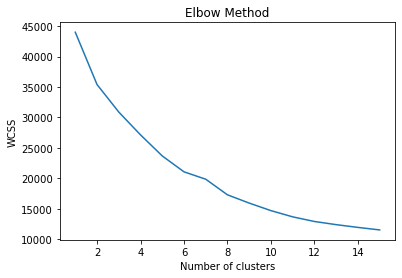

In [30]:
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow is not clearly visible, so lets take help of silhouette score to find out optimum no. of clusters.

In [31]:
for i in range (2,16):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(airlines_std) 
        sil_score =sil(airlines_std , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score)  

For cluster = 2 The silhouette score is 0.3257060145329871
For cluster = 3 The silhouette score is 0.3111038346820003
For cluster = 4 The silhouette score is 0.32048584058774454
For cluster = 5 The silhouette score is 0.32375619142546985
For cluster = 6 The silhouette score is 0.3327949137024568
For cluster = 7 The silhouette score is 0.26577652217528075
For cluster = 8 The silhouette score is 0.23669847546322711
For cluster = 9 The silhouette score is 0.29892167080233395
For cluster = 10 The silhouette score is 0.26152289188446176
For cluster = 11 The silhouette score is 0.2677620338174949
For cluster = 12 The silhouette score is 0.2747091046689006
For cluster = 13 The silhouette score is 0.2691925979169026
For cluster = 14 The silhouette score is 0.27041305382843694
For cluster = 15 The silhouette score is 0.27265461657652895


### Silhouette score is maximum for n_clusters = 2

In [32]:
clusters = KMeans(n_clusters=2, random_state= 1)
clusters.fit(airlines_std)

KMeans(n_clusters=2, random_state=1)

In [33]:
clusters.labels_ 

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
airlines['Clusterid_kmeans'] = clusters.labels_ 
airlines 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans
Id,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1


In [35]:
airlines['Clusterid_kmeans'].value_counts()

1    2699
0    1299
Name: Clusterid_kmeans, dtype: int64

In [36]:
airlines.groupby('Clusterid_kmeans').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusterid_kmeans,,,,,,,,,,,,
0,132849.454965,258.394149,3.612009,1.010008,1.036952,41481.426482,20.393380,969.467283,2.909161,4941.665127,0.709777,0.290223
1,45112.733235,89.166358,1.312708,1.016673,1.000371,5438.261208,7.374954,215.051871,0.635050,3723.341608,0.207114,0.792886


Optimum no. of clusters is 2

Cluster0 indicates the group of fliers that earn the most out of the card and are frequent fliers

Cluster1 indicates the group of fliers that earn the least and are the least frequent fliers

# 3)DB SCAN 

K-means, hierarchical clustering work for finding spherical-shaped clusters or convex clusters. They are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

In real life, Clusters can be of arbitrary shape and may contain noise.

Hence, to overcome these shortcomings we use DB SCAN

### The DBSCAN algorithm uses two parameters: 

minPts: The minimum number of points clustered together for a region to be considered dense.

eps (ε): A distance that will be used to locate the points in the neighborhood of any point. 

### There are three types of points after the DBSCAN clustering is complete:

Core — This is a point that has at least m points within distance n from itself.

Border — This is a point that has at least one Core point at a distance n.

Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

#### Silhouette score

In [37]:
df=pd.DataFrame()
epss=[]
min_sample=[]
sil_scores=[]

In [38]:
eps = [0.25,0.5,0.75,1.00,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]
min_samples = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

for i in range (len(eps)):
    for j in range (len(min_samples)):
        dbscan = DBSCAN(eps=eps[i] , min_samples=min_samples[j])
        dbscan.fit(airlines_std)
        sil_score=sil(airlines_std, dbscan.labels_)
        epss.append(eps[i])
        min_sample.append(min_samples[j])
        sil_scores.append(sil_score) 

In [39]:
df['eps']=epss
df['min_sample']=min_sample
df['sil_scores']=sil_scores

In [40]:
df['sil_scores'].max() 

0.6454683428134459

In [41]:
df['sil_scores'].idxmax()

252

In [42]:
df.iloc[252:253, :]

,eps,min_sample,sil_scores
252,2.75,24,0.645468


### Silhouette score is maximum for eps = 2.75 and min_sample = 24

In [43]:
dbscan = DBSCAN(eps= 2.75, min_samples=24)
dbscan.fit(airlines_std) 

DBSCAN(eps=2.75, min_samples=24)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
airlines['Noise'] = dbscan.labels_ 
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans,Noise
Id,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,0


In [46]:
airlines.Noise.value_counts()
#184 data points are categorised as noise

 0    3814
-1     184
Name: Noise, dtype: int64

In [47]:
df=airlines.groupby('Noise').agg('mean')
df 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterId_hc,Clusterid_kmeans
Noise,,,,,,,,,,,,,
-1,220448.108696,1568.804348,2.418478,1.315217,1.266304,45862.885870,24.472826,3278.190217,9.228261,4669.641304,0.679348,0.320652,0.250000
0,66535.987677,75.420556,2.042475,1.000000,1.000000,15763.888044,10.984006,324.220241,0.995018,4092.634504,0.355532,0.644468,0.695595


<AxesSubplot:xlabel='Noise', ylabel='cc2_miles'>

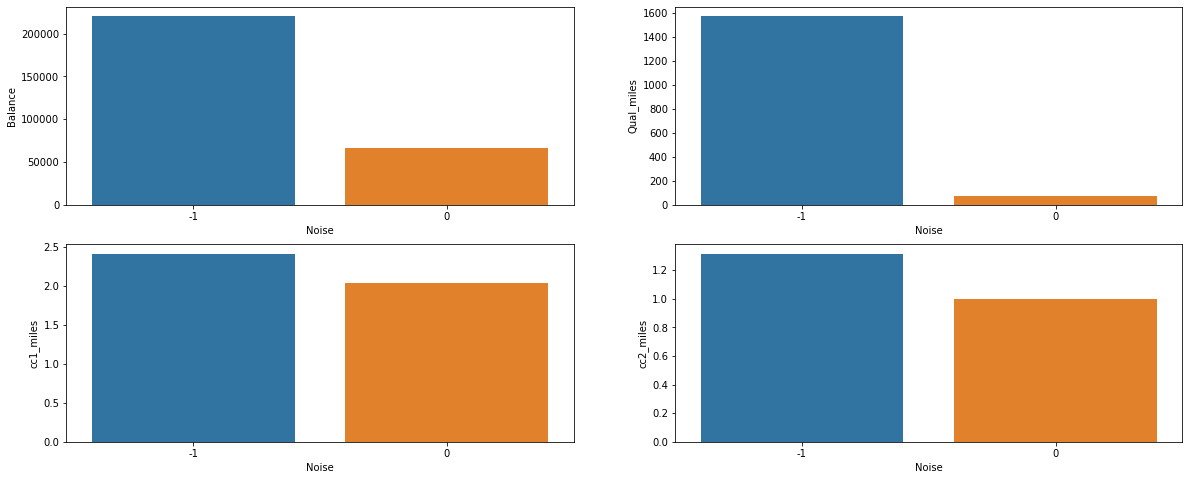

In [48]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.barplot(x=df.index , y=df.Balance)

plt.subplot(2,2,2)
sns.barplot(x=df.index , y=df.Qual_miles)

plt.subplot(2,2,3)
sns.barplot(x=df.index , y=df.cc1_miles)

plt.subplot(2,2,4)
sns.barplot(x=df.index , y=df.cc2_miles)

<AxesSubplot:xlabel='Noise', ylabel='Flight_miles_12mo'>

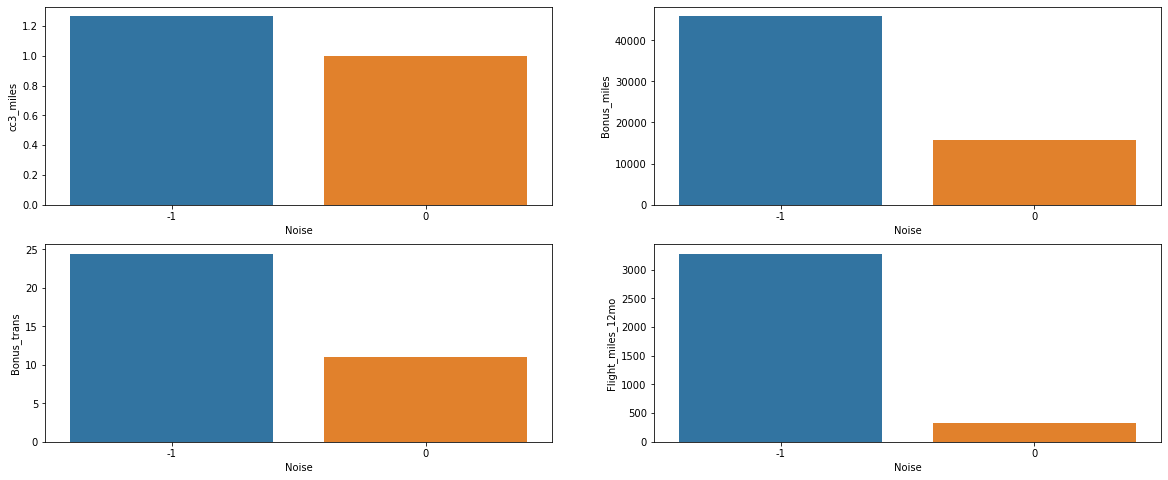

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.barplot(x=df.index , y=df.cc3_miles)

plt.subplot(2,2,2)
sns.barplot(x=df.index , y=df.Bonus_miles)

plt.subplot(2,2,3)
sns.barplot(x=df.index , y=df.Bonus_trans)

plt.subplot(2,2,4)
sns.barplot(x=df.index , y=df.Flight_miles_12mo)

<AxesSubplot:xlabel='Noise', ylabel='Award'>

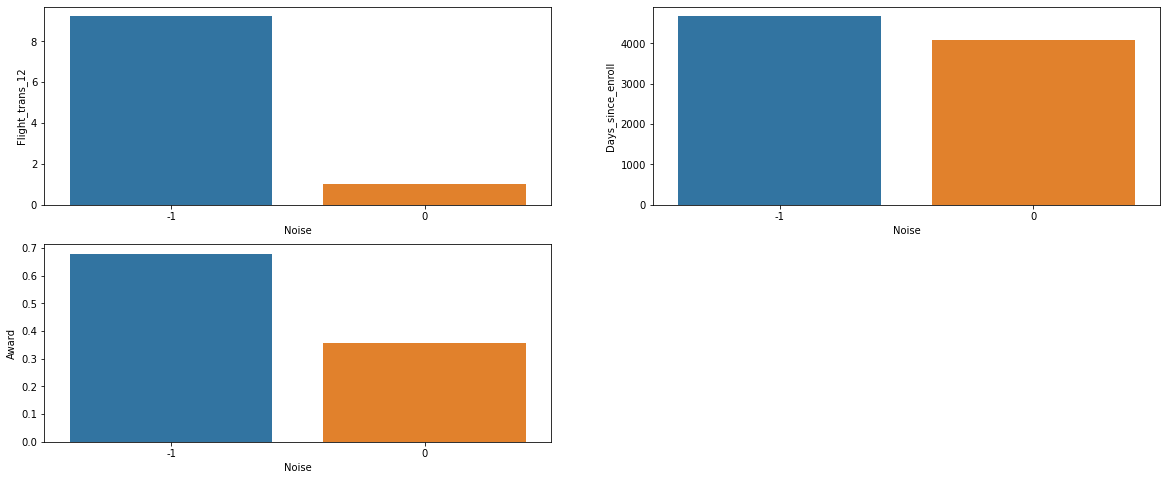

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.barplot(x=df.index , y=df.Flight_trans_12)

plt.subplot(2,2,2)
sns.barplot(x=df.index , y=df.Days_since_enroll)

plt.subplot(2,2,3)
sns.barplot(x=df.index , y=df.Award)


# Thank You